In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

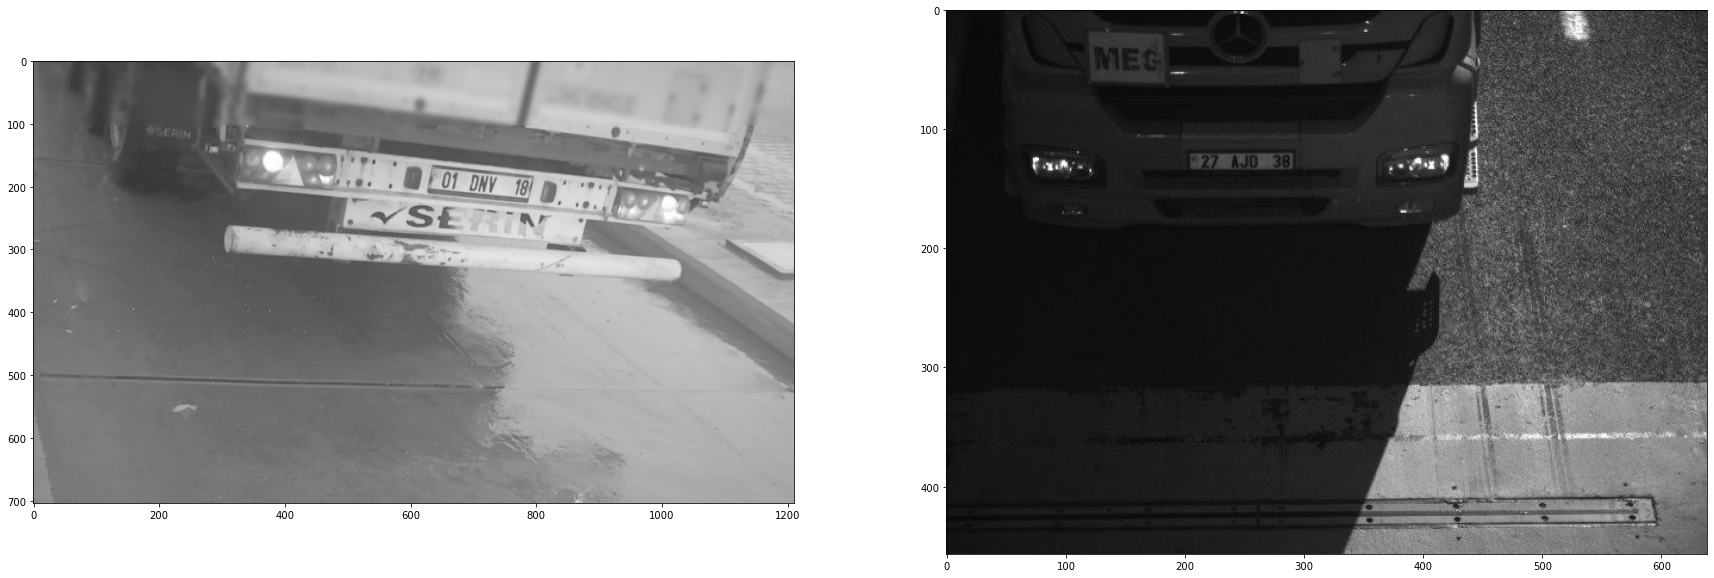

In [16]:
car_bright = cv2.imread('image7.jpg')
fig = plt.figure(figsize=(30,30))
car_dark = cv2.imread('image_dark.jpg')
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(car_bright)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(car_dark)

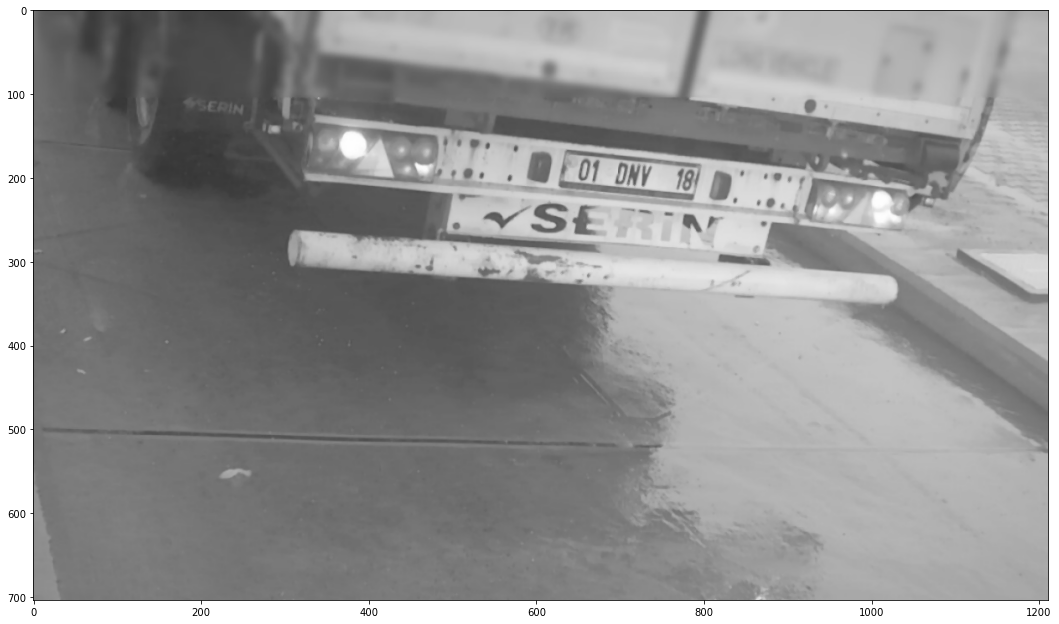

In [17]:
#gray scaling the dark img to make it bright
car_dark = cv2.cvtColor(car_bright, cv2.COLOR_BGR2RGB)
car_dark=cv2.cvtColor(car_bright, cv2.COLOR_BGR2GRAY)


fig = plt.figure(figsize=(40,40))
ax1 = fig.add_subplot(2,2,1)
filtered_img = cv2.medianBlur(car_dark,3)
filtered_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)
ax1.imshow(filtered_img)


86 161


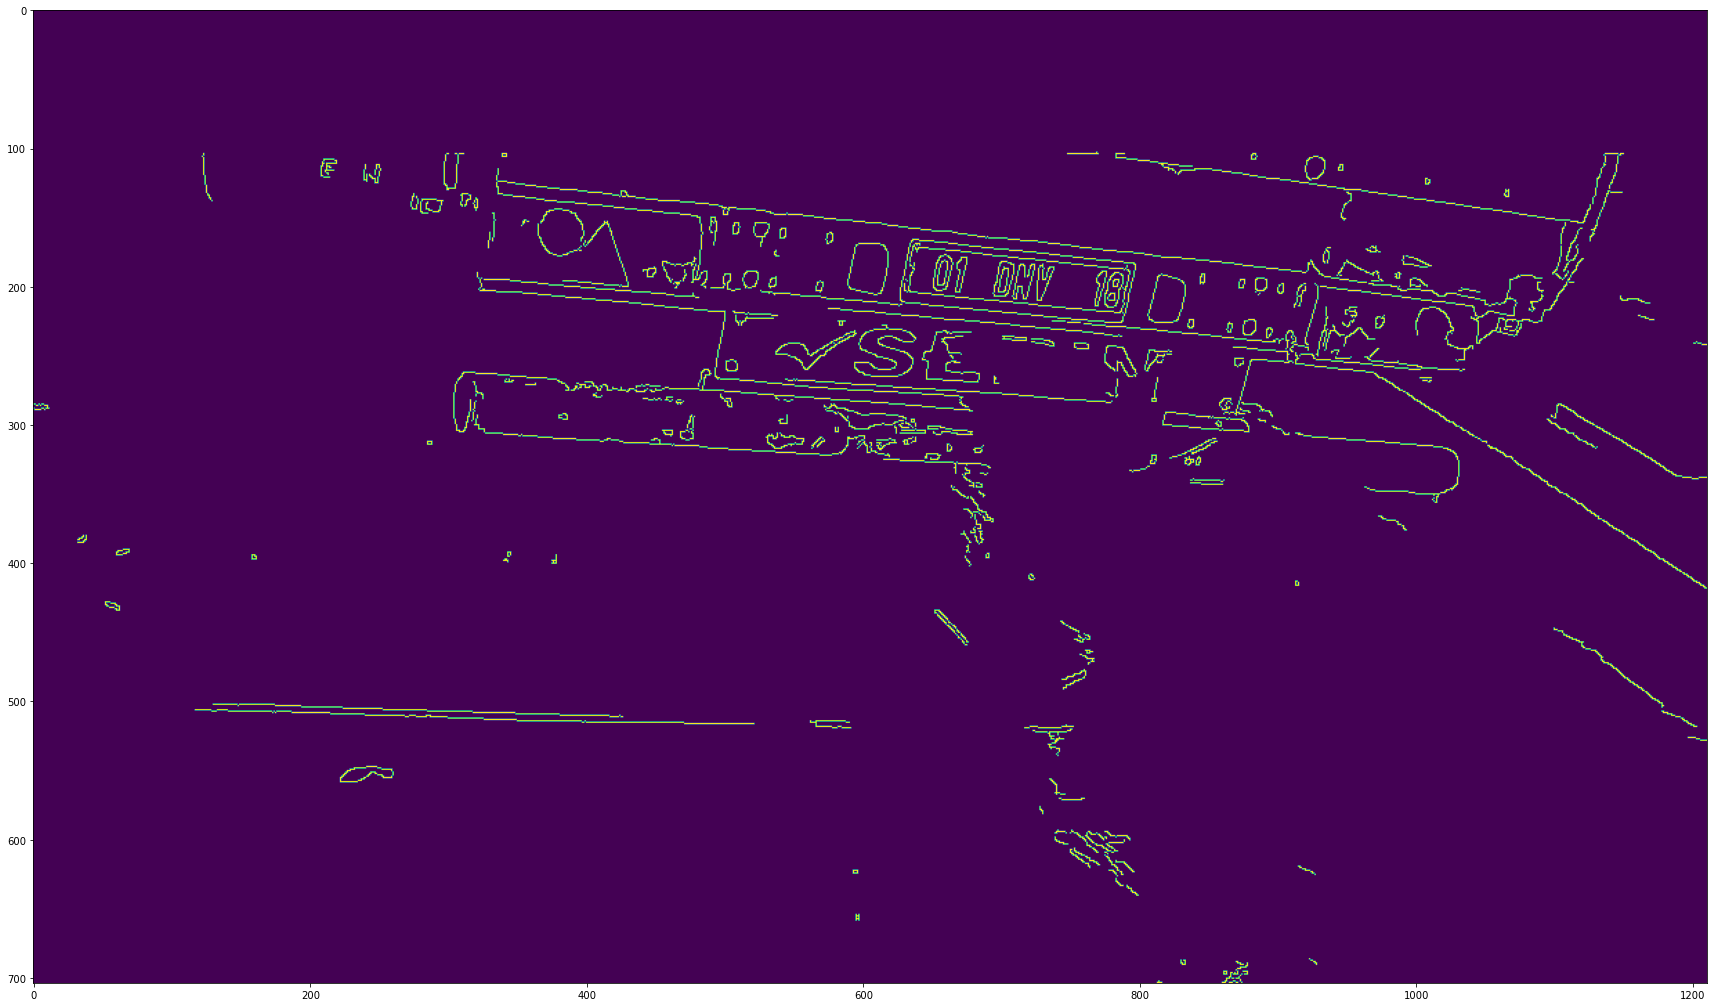

In [18]:
#med_val=np.median(filtered_img)

#alternative med value calc
#plt.hist(car_bright.mean(axis=2).flatten(),255)
sigma = 0.3
median = np.median(car_bright)
lower = int(max(0,(1.0-sigma)*median))
higher = int(min(255,(1.0+sigma)*median))
print(lower,higher)
edges = cv2.Canny(car_bright,lower,higher )
fig=plt.figure(figsize=(30,30))
plt.imshow(edges)

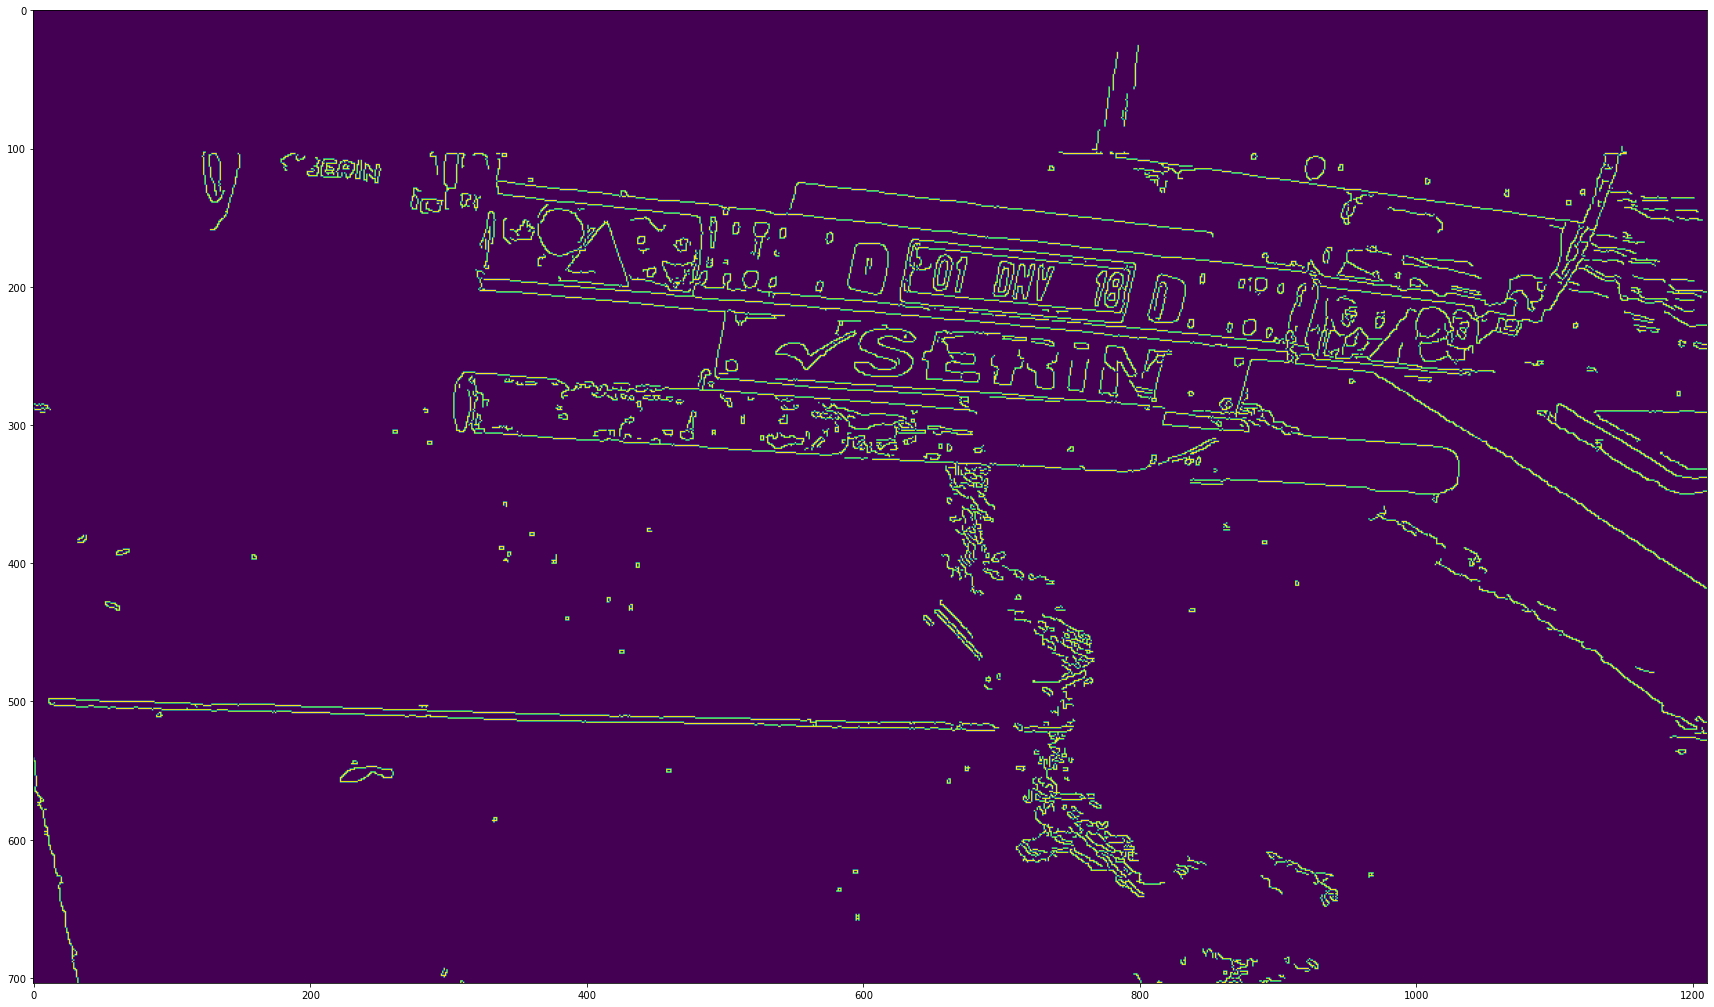

In [19]:
fig=plt.figure(figsize=(30,30))
edges2=cv2.Canny(car_bright,45,95)
plt.imshow(edges2)

In [20]:
import imutils
#CHAIN_APPROX_NONE GIVES MORE POINTS COMPARED TO CHAIN_APPROX_SIMPLE
thresh =edges2.copy()
cnts,hr = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("num of contours = ", str(len(cnts)))


num of contours =  500


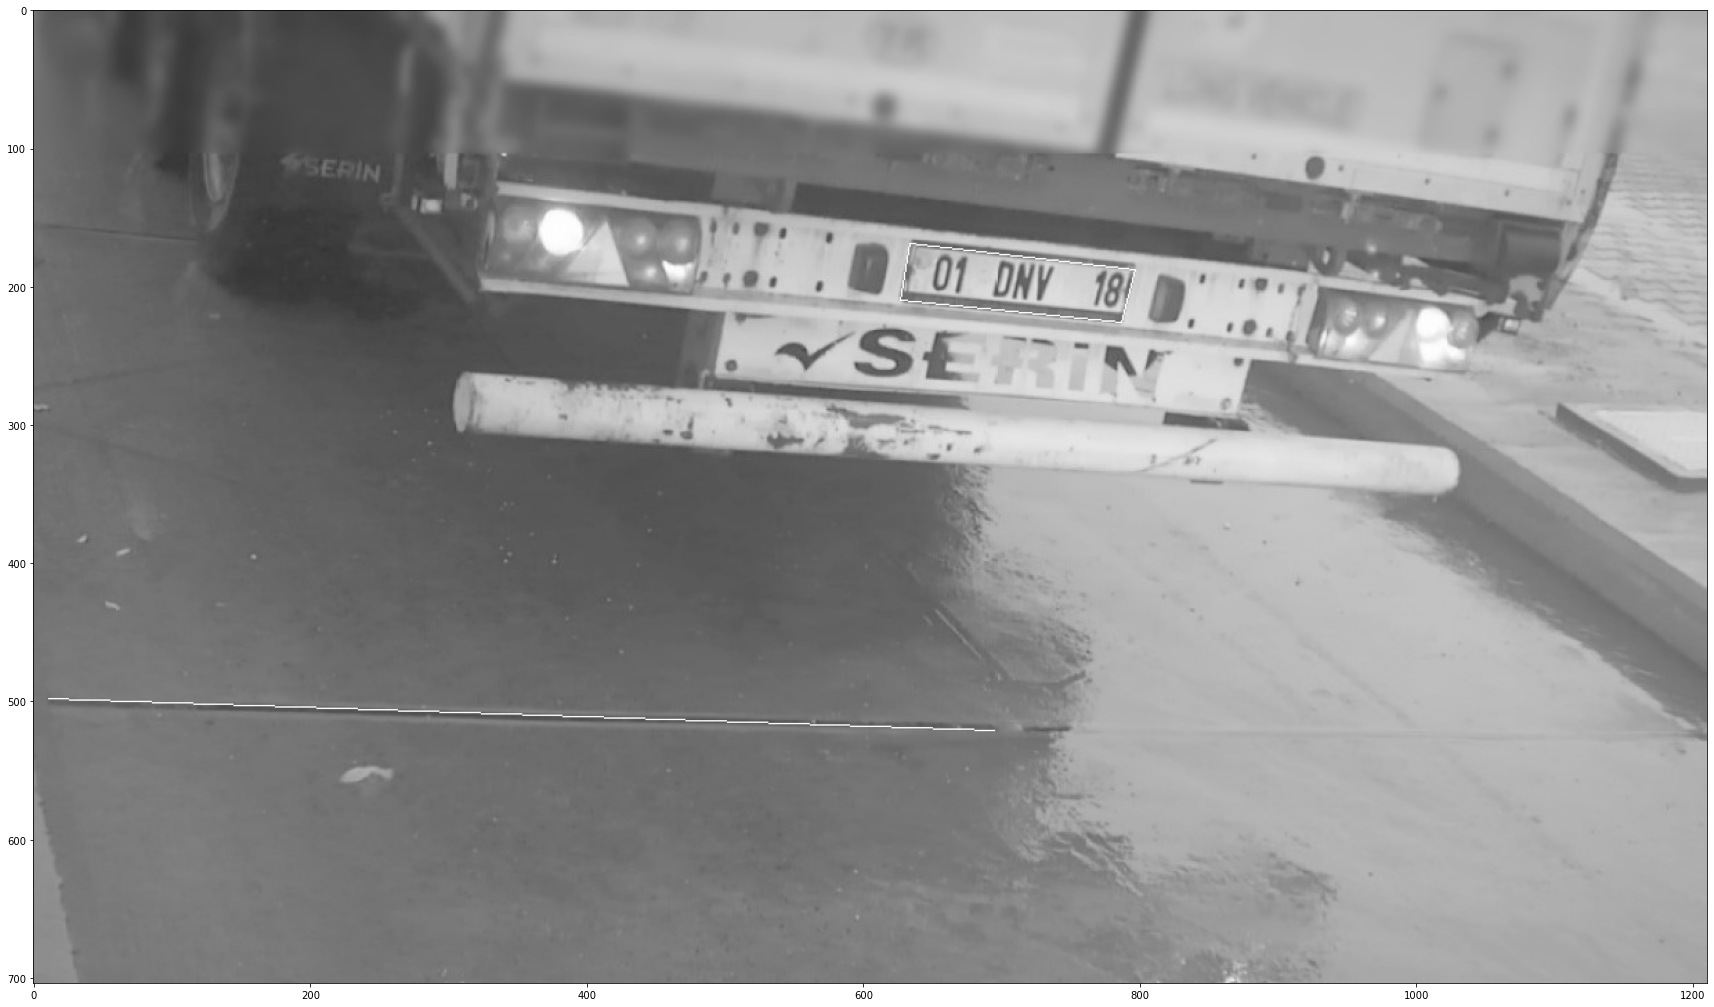

In [21]:
imgCopy=car_bright.copy()
plt.figure(figsize=(30,30))
loc=None
for cnt in cnts:
    area = cv2.contourArea(cnt)
    if area> 1000:
        peri = cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        # -1 defines    ,(..,...,...) defines rgb colors(in this case yellow) and 1 defines how bold the frame width is
        countered = cv2.drawContours(imgCopy, [approx], -1,(255,255,255),1)
        if len(approx) == 4:
            loc=approx
            plt.imshow(countered)
        


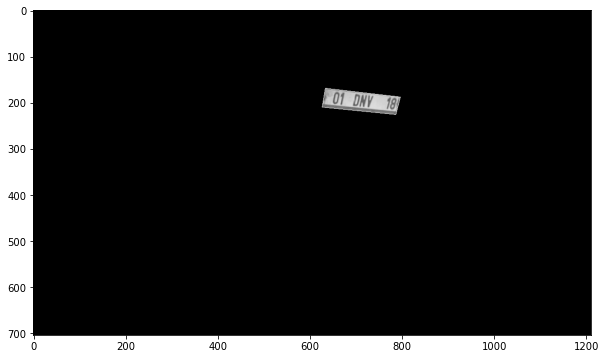

In [22]:
plt.figure(figsize=(10,10))
#mask consists of an array of 0's of our images's size.
mask = np.zeros(car_bright.shape, np.uint8)
#we want plate's color as it is and make the frame border colorful 
#thats why rbg values are (255,255,255)
mask = cv2.drawContours(mask,[loc],0,(255,255,255),-1)
masked = cv2.bitwise_and(countered,mask)
plt.imshow(masked)

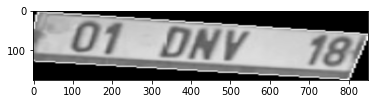

In [23]:
#time to extract image from the black background
x,y,w,h = cv2.boundingRect(loc)
new = masked[y:y+h,x+5:x+w-1]
new = cv2.resize(new, (850,175))

#new = cv2.cvtColor(new,cv2.COLOR_BGR2GRAY)
#new = cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
plt.imshow(new)

In [24]:
!pip install easyocr

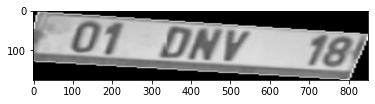

In [25]:
kernel= np.ones((2,2),np.uint8)
opening = cv2.erode(new,kernel, iterations=1)
plt.imshow(opening)



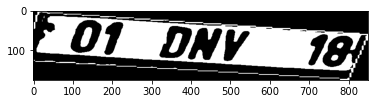

In [26]:
ret, thresh2 = cv2.threshold(new, 175, 255, cv2.THRESH_BINARY) 
plt.imshow(thresh2)

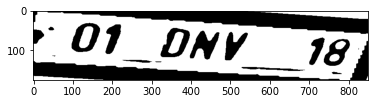

In [27]:
#adaptive threshold
img_gray = cv2.cvtColor(opening, cv2.COLOR_BGR2GRAY)
adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,81,10)
plt.imshow(adaptive, cmap='gray')

In [28]:
import pytesseract


In [29]:
text_rec = pytesseract.image_to_string(adaptive, lang='eng',config='--psm 7')

In [30]:
print(text_rec)

"01 _ONV 181

